In [2]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [3]:
df=pd.read_csv("adidas-quarterly-sales.csv")

In [4]:
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [5]:
import plotly.express as px

In [6]:
px.line(df,x="Time Period",y="Revenue")

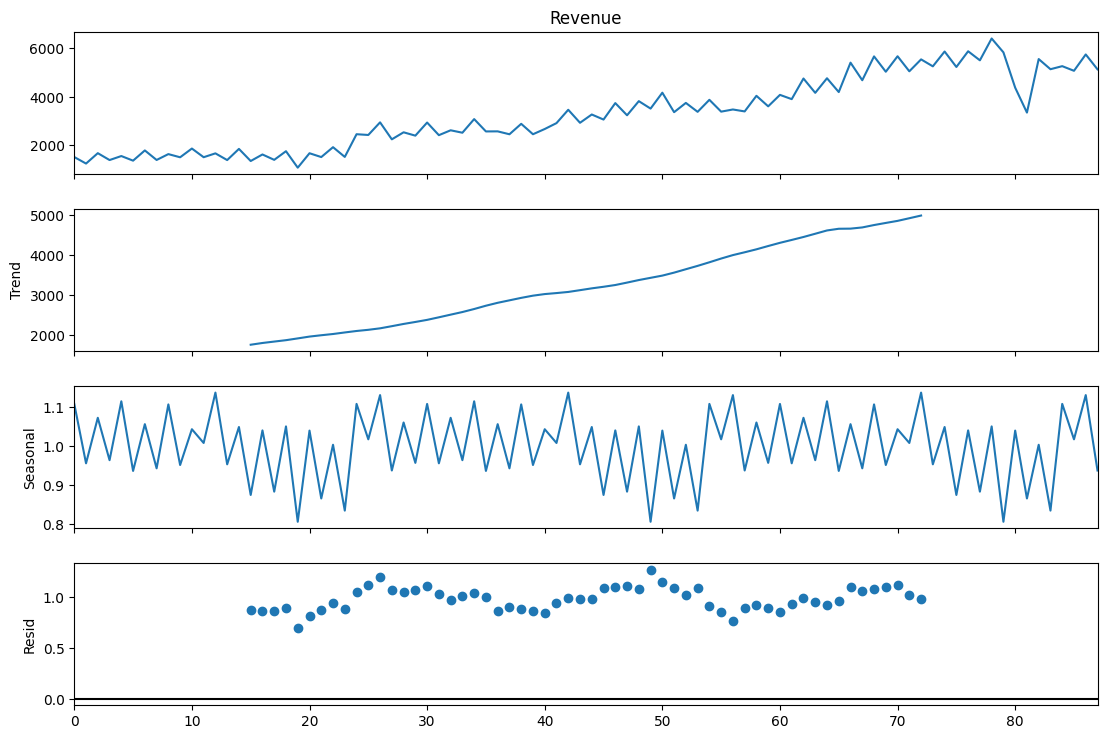

In [10]:
#Decomposition
result=seasonal_decompose(df["Revenue"],model="multiplicative",period=30)

fig = result.plot()
fig.set_size_inches(12,8)
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

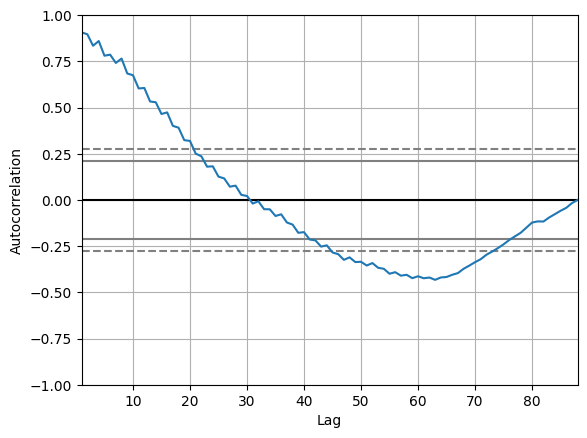

In [11]:
pd.plotting.autocorrelation_plot(df["Revenue"])


In [14]:
model=sm.tsa.statespace.SARIMAX(df["Revenue"])
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   88
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -685.939
Date:                Fri, 27 Sep 2024   AIC                           1375.877
Time:                        23:29:54   BIC                           1380.832
Sample:                             0   HQIC                          1377.874
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9878      0.014     68.840      0.000       0.960       1.016
sigma2      3.324e+05   4.14e+04      8.028      0.000    2.51e+05    4.14e+05
===================================================================================
Ljung-Box (L1) (Q):                  33.98   Jarque-Bera (JB):                 7.84
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               3.78   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

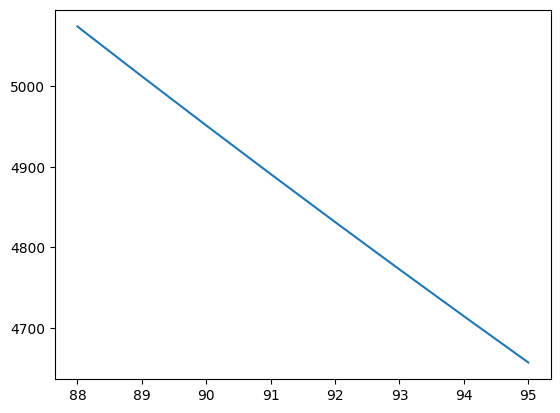

In [16]:
predictions=model.fit().predict(len(df),len(df)+7)
predictions.plot()


<Axes: >

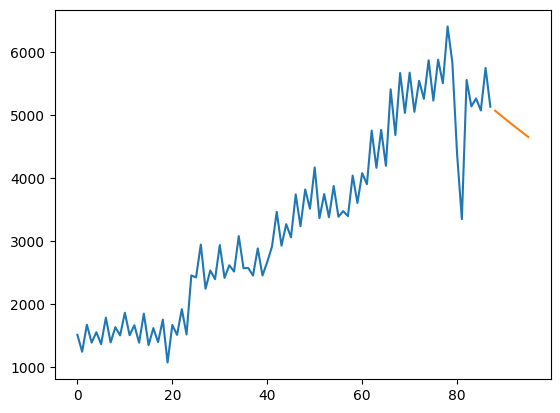

In [17]:
df["Revenue"].plot()
predictions.plot()


In [ ]:
# Deep Learning Model CON2d CNN, LSTM Time series, pycaret AutoML